<a href="https://www.kaggle.com/code/aaradhyakulkarni/boston-house-price-prediction?scriptVersionId=186904267" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [124]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.pipeline import Pipeline


In [125]:
train = pd.read_csv('/kaggle/input/boston-house-dataset/train.csv')
test = pd.read_csv('/kaggle/input/boston-house-dataset/test.csv')


In [126]:
train.sample(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
161,235,0.44791,0.0,6.20,1,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,29.0
291,449,9.32909,0.0,18.10,0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13,14.1
242,368,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
77,117,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04,21.2
68,102,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
89,132,1.19294,0.0,21.89,0,0.624,6.326,97.7,2.2710,4,437,21.2,396.90,12.26,19.6
299,461,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,16.4
281,435,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666,20.2,100.63,15.17,11.7
198,298,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84,20.3
255,388,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4


In [127]:
train.describe(include="all")

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [128]:
train.isna().sum()  

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Q-Q plot for column: ID


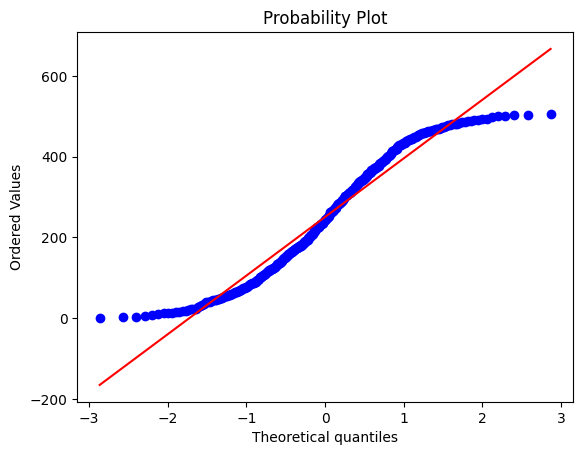

Q-Q plot for column: crim


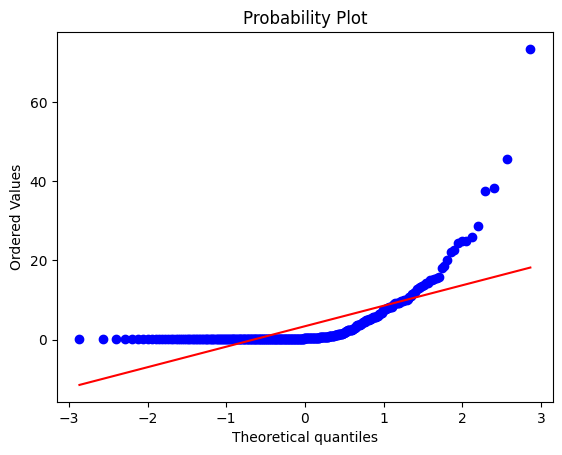

Q-Q plot for column: zn


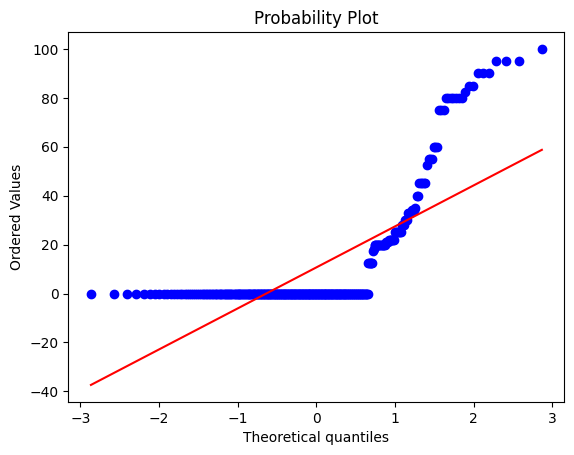

Q-Q plot for column: indus


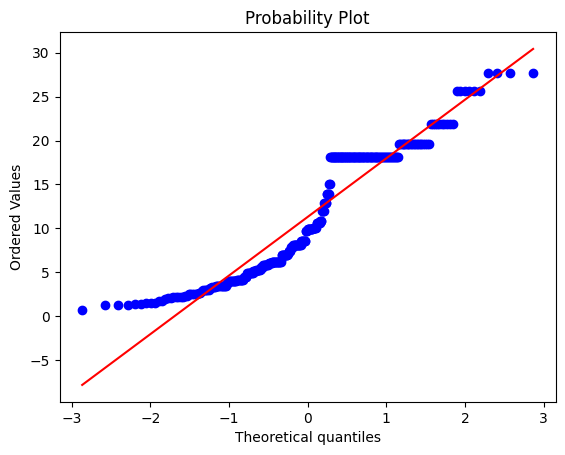

Q-Q plot for column: chas


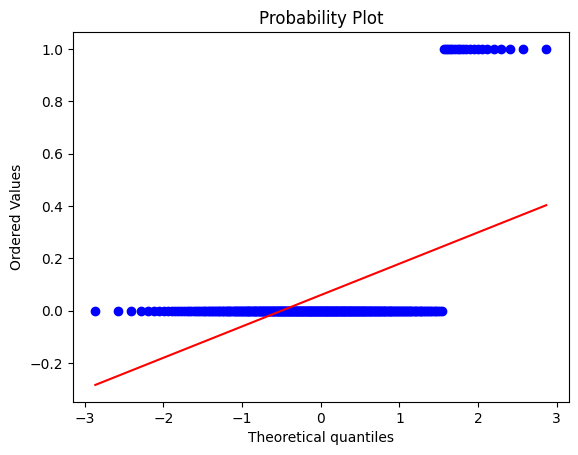

Q-Q plot for column: nox


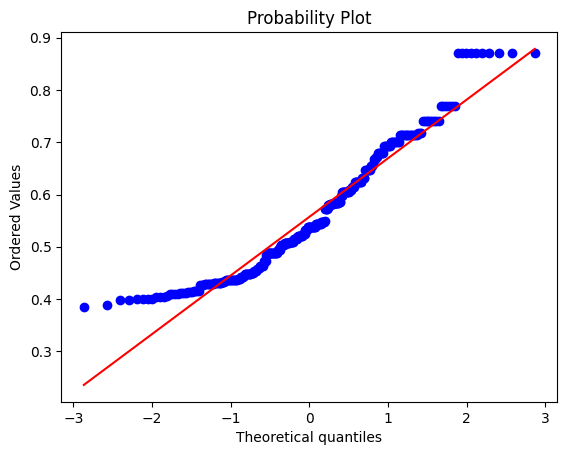

Q-Q plot for column: rm


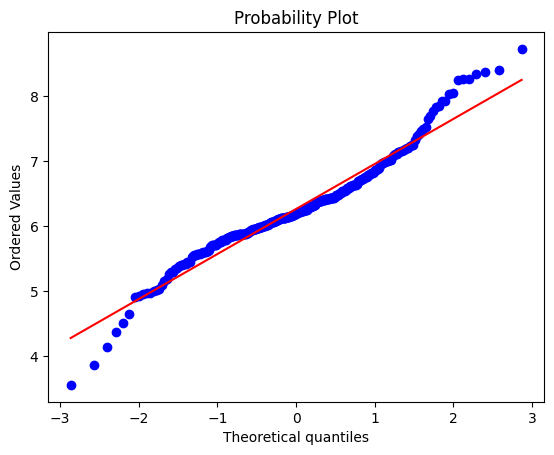

Q-Q plot for column: age


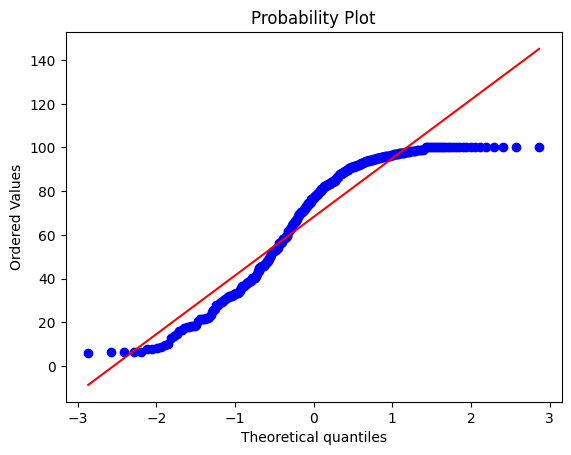

Q-Q plot for column: dis


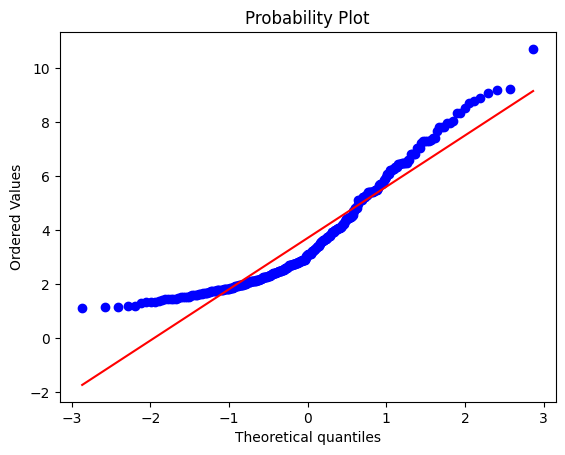

Q-Q plot for column: rad


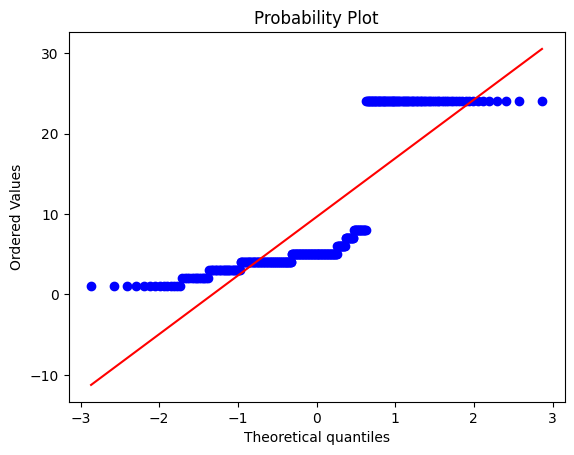

Q-Q plot for column: tax


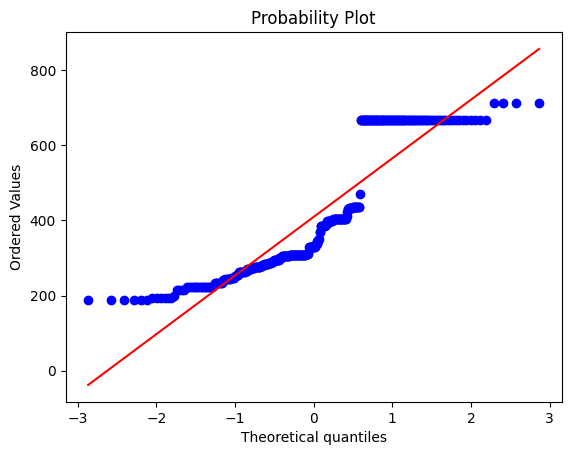

Q-Q plot for column: ptratio


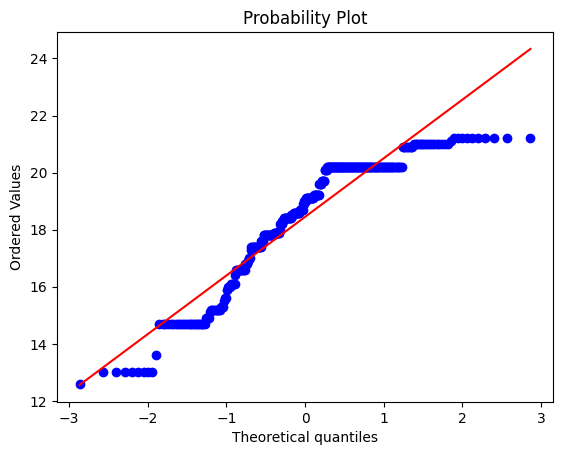

Q-Q plot for column: black


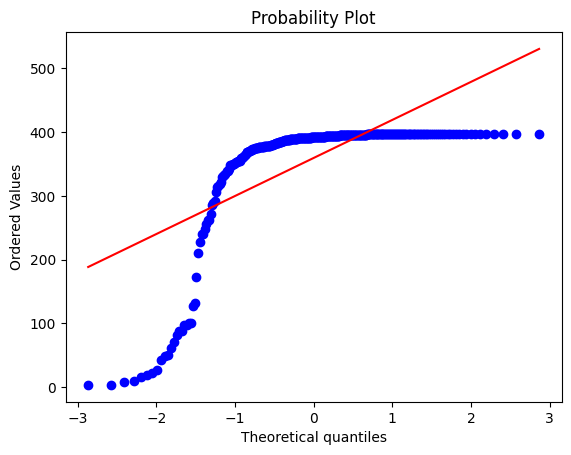

Q-Q plot for column: lstat


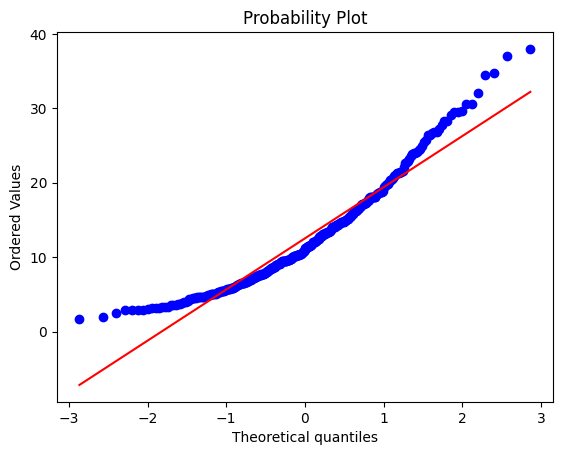

Q-Q plot for column: medv


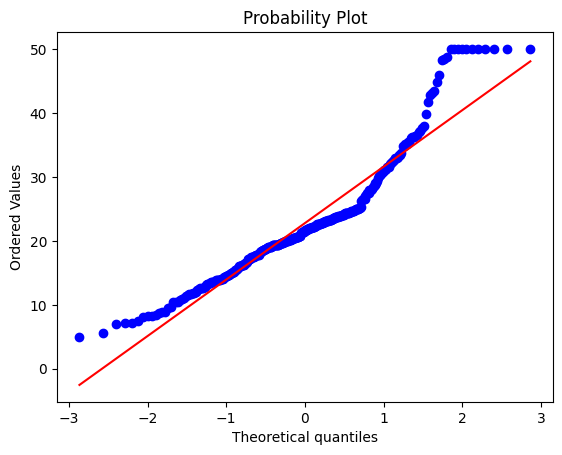

In [129]:
for column in train.columns:
    print(f"Q-Q plot for column: {column}")
    stats.probplot(train[column], dist="norm", plot=plt)
    plt.show()

In [130]:
scaler = StandardScaler()

model = LinearRegression()

pipeline = Pipeline(steps=[('s', scaler), ('m', model)])

In [131]:
X = train.drop(columns=['ID', 'medv'])
y = train['medv']


In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((326, 13), (7, 13), (326,), (7,))

In [133]:
pipeline.fit(x_train, y_train)
predictions = pipeline.predict(x_test)

In [134]:
pipeline.fit(x_train, y_train)

# Make predictions
predictions = pipeline.predict(x_test)

In [135]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 3.2186531740037174


c:\Users\aarad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

  warnings.warn(


In [136]:
test_x = test.drop(columns=['ID'])
test_predictions = pipeline.predict(test_x)

In [137]:
submission = pd.DataFrame({'ID': test['ID'], 'medv': test_predictions})
submission.to_csv('submission.csv', index=False)